In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
local_weights_file='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model=InceptionV3(input_shape=(150,150,3),
weights=None,
include_top=False)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable=False
last_layer=pre_trained_model.get_layer('mixed7')
last_output=last_layer.output

In [3]:
from tensorflow.keras.optimizers import RMSprop
x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)

model.compile(loss='binary_crossentropy',
optimizer=RMSprop(learning_rate=0.0001),
metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255.,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=train_datagen.flow_from_directory('training',
target_size=(150,150),
batch_size=90,
class_mode='binary')
validation_generator=test_datagen.flow_from_directory('valid',
target_size=(150,150),
class_mode='binary',
batch_size=20)


Found 9000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
history=model.fit(train_generator,
validation_data=validation_generator,
steps_per_epoch=100,
epochs=10,
verbose=2,
validation_steps=100)

Epoch 1/10
100/100 - 319s - loss: 0.2946 - accuracy: 0.8802 - val_loss: 0.1662 - val_accuracy: 0.9325
Epoch 2/10
100/100 - 152s - loss: 0.1800 - accuracy: 0.9280 - val_loss: 0.1115 - val_accuracy: 0.9530
Epoch 3/10
100/100 - 204s - loss: 0.1537 - accuracy: 0.9357 - val_loss: 0.0890 - val_accuracy: 0.9675
Epoch 4/10
100/100 - 153s - loss: 0.1565 - accuracy: 0.9369 - val_loss: 0.0871 - val_accuracy: 0.9675
Epoch 5/10
100/100 - 211s - loss: 0.1506 - accuracy: 0.9399 - val_loss: 0.0849 - val_accuracy: 0.9670
Epoch 6/10
100/100 - 153s - loss: 0.1385 - accuracy: 0.9468 - val_loss: 0.0763 - val_accuracy: 0.9690
Epoch 7/10
100/100 - 199s - loss: 0.1379 - accuracy: 0.9469 - val_loss: 0.0838 - val_accuracy: 0.9660
Epoch 8/10
100/100 - 173s - loss: 0.1308 - accuracy: 0.9452 - val_loss: 0.1046 - val_accuracy: 0.9605
Epoch 9/10
100/100 - 181s - loss: 0.1313 - accuracy: 0.9474 - val_loss: 0.0714 - val_accuracy: 0.9705
Epoch 10/10
100/100 - 240s - loss: 0.1259 - accuracy: 0.9524 - val_loss: 0.0748 - 

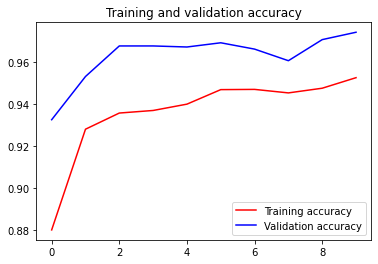

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()